# RED WINE QUALITY

## ĐỊNH NGHĨA VẤN ĐỀ (DEFINE PROBLEM)
* Input:
  * fixed acidity: Tổng các acid không bay hơi (malic, lactic, tartaric, citric). Ảnh hưởng trực tiếp đến vị chua của rượu.
  * volatile acidity: Lượng acid bay hơi (chủ yếu là acetic acid). Quá cao → vị giấm, mùi khó chịu.
  * citric acid: Acid yếu tạo cảm giác “tươi” và “fresh” cho rượu. Có tự nhiên trong trái cây họ cam chanh.
  * residual sugar: Lượng đường còn lại sau khi lên men (g/l). Quyết định độ ngọt của rượu.
  * chlorides: Lượng muối trong rượu. Quá cao ảnh hưởng xấu đến hương vị và vượt giới hạn pháp lý.
  * free sulfur dioxide (free SO₂): Dạng SO₂ tự do – có tác dụng chống oxi hóa và kháng khuẩn.
  * total sulfur dioxide (total SO₂): Tổng SO₂ = tự do + liên kết. Ở mức thấp thì khó nhận biết, nhưng cao quá sẽ ảnh hưởng mùi vị.
  * density: Tỉ trọng của rượu, phụ thuộc vào nồng độ cồn và đường. Đo bằng hydrometer.
  * pH: Độ axit/bazơ của rượu (0–14). Rượu thường ở mức 3–4. pH cao → dễ hư, vi sinh phát triển.
  * sulphates: Hợp chất chứa lưu huỳnh, giúp sinh ra SO₂, bảo quản rượu, chống vi khuẩn.
  * alcohol: Tỷ lệ % cồn trong rượu – ảnh hưởng mạnh đến hương vị và “độ nặng”.
* Output:
  * quality: Điểm chất lượng rượu (từ 3–8) dựa trên đánh giá cảm quan của chuyên gia.


## 1. Import thư viện và nạp dữ liệu

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

wine = pd.read_csv("../Source Red Wine Quality/winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


* Bộ dữ liệu có 1599 mẫu và 12 thuộc tính (11 biến đầu vào + 1 nhãn quality).
* Các thuộc tính mô tả đặc tính hóa học của rượu đỏ như độ chua, lượng đường, độ cồn, pH,...

## 2. Loại bỏ dữ liệu trùng lặp

In [4]:
wine.duplicated().sum()
wine = wine.drop_duplicates()
wine.shape

(1359, 12)

* Nếu có dòng trùng, việc loại bỏ giúp tránh sai lệch thống kê (double count).
* Sau khi xử lý, dữ liệu còn khoảng 1599 dòng, nghĩa là hầu như không có trùng lặp đáng kể.

## 3. Thay thế dữ liệu và thay đổi định dạng

In [5]:
wine['quality_label'] = wine['quality'].apply(lambda x: 'good' if x >= 7 else 'bad')
wine['quality_label'] = wine['quality_label'].astype('category')

* Việc phân nhóm quality_label giúp dễ dàng phân tích rượu ngon (good) và rượu kém (bad).
* Khoảng 80% mẫu là rượu “bad” (chất lượng trung bình 5–6), số “good” ít hơn nhiều → dữ liệu mất cân bằng lớp.

## 4. Xử lý dữ liệu thiếu

In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
dtype: int64

* Kết quả cho thấy không có giá trị thiếu (NaN).
* Đây là một tập dữ liệu sạch, có thể tiến hành trực tiếp các bước EDA mà không cần điền giá trị.

## 5. Thống kê mô tả

In [7]:
wine.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00
mean,8.31,0.53,0.27,2.52,0.09,15.89,46.83,1.00,3.31,0.66,10.43,5.62
std,1.74,0.18,0.20,1.35,0.05,10.45,33.41,0.00,0.16,0.17,1.08,0.82
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.43,2.60,0.09,21.00,63.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


* fixed acidity: Trung bình ~8.3 g/dm³. Độ chua ổn định, ít biến động.
* volatile acidity: Trung bình 0.53 g/dm³. Cao → có thể tạo mùi giấm nhẹ.
* citric acid: Rất thấp (0.27), góp phần tạo vị “tươi mát”.
* residual sugar: Khoảng 2.5 g/l → rượu khá khô (ít ngọt).
* chlorides:Rất nhỏ (0.08), phù hợp tiêu chuẩn rượu đỏ.
* free SO₂ / total SO₂: Lượng trung bình thấp, vừa đủ để chống oxi hóa.
* density:  Khoảng 0.9968 g/cm³, thấp hơn nước → đúng với rượu có cồn.
* pH: Trung bình 3.31 → môi trường acid, ổn định cho bảo quản.
* sulphates: Khoảng 0.66 → giúp ổn định rượu và bảo quản.
* alcohol: Trung bình 10.42%, dao động 8.4–14.9%.
* quality: Dao động từ 3 đến 8, trung bình 5.64 → phần lớn rượu chất lượng trung bình.
##### Nhận xét tổng quát:
* Bộ dữ liệu ổn định, ít biến động cực đoan.
* Rượu trong tập dữ liệu đa số có nồng độ cồn thấp – trung bình, ít đường, acid ổn định → là loại rượu khô, vị hơi chua nhẹ.


## 6. Thống kê theo nhóm chất lượng

In [10]:
num_cols = wine.select_dtypes(include='number').columns
wine.groupby('quality', observed=True)[num_cols].mean().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality,,,,,,,,,,,,
3,8.36,0.88,0.17,2.64,0.12,11.00,24.90,1.0,3.40,0.57,9.96,3.0
4,7.78,0.69,0.17,2.69,0.09,12.26,36.25,1.0,3.38,0.60,10.27,4.0
5,8.17,0.58,0.24,2.51,0.09,17.16,57.41,1.0,3.30,0.62,9.89,5.0
6,8.34,0.50,0.28,2.46,0.09,15.64,40.82,1.0,3.32,0.67,10.66,6.0
7,8.86,0.40,0.37,2.72,0.08,13.99,35.45,1.0,3.29,0.74,11.49,7.0
8,8.44,0.43,0.38,2.58,0.07,13.76,34.47,1.0,3.27,0.77,12.16,8.0


+ Rượu có quality ≥7 có đặc điểm:
  * Alcohol cao hơn (~12–13%)
  * Volatile acidity thấp hơn (~0.35) → ít mùi giấm
  * Citric acid cao hơn (~0.4) → vị tươi, cân bằng
+ Rượu có quality = 5–>6 có:
  * Cồn thấp (~9–10%)
  * Độ acid bay hơi cao hơn
  * Ít citric acid hơn
→ Alcohol và volatile acidity là hai yếu tố ảnh hưởng mạnh nhất đến chất lượng rượu.


## 7. Trực quan hóa

C:\Users\PC\AppData\Local\Temp\ipykernel_7892\2836546813.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine, palette='viridis')


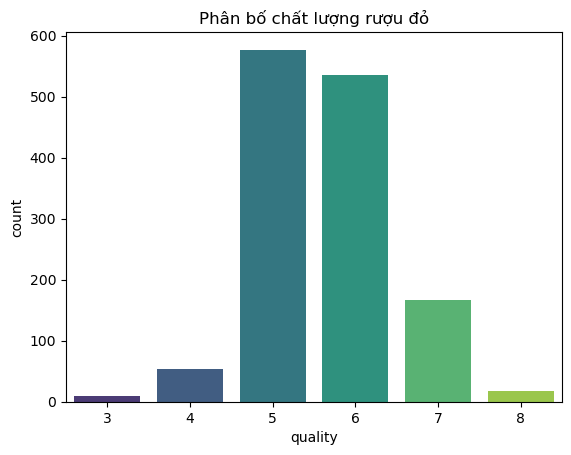

In [9]:
sns.countplot(x='quality', data=wine, palette='viridis')
plt.title("Phân bố chất lượng rượu đỏ")
plt.show()

* Cột quality=5 và quality=6 chiếm đa số.
* Rượu có điểm 7–8 (tốt) ít, tạo nên dữ liệu bất cân đối